In [1]:
import warnings
warnings.filterwarnings("ignore")

from jqdatasdk import *
auth('18810883096', 'Ww19930921')
# 查询是否连接成功
is_auth = is_auth()

提示：当前环境pandas版本为0.25，get_price与get_fundamentals_continuously接口panel参数将固定为False
注意：0.25以上版本pandas不支持panel，如使用该数据结构和相关函数请注意修改
auth success 


In [7]:
#兖洲煤业 600188
get_industry("002078.XSHE", date=None)

{'002078.XSHE': {'sw_l1': {'industry_code': '801140',
   'industry_name': '轻工制造I'},
  'sw_l2': {'industry_code': '801143', 'industry_name': '造纸II'},
  'sw_l3': {'industry_code': '851411', 'industry_name': '造纸III'},
  'zjw': {'industry_code': 'C22', 'industry_name': '造纸和纸制品业'},
  'jq_l2': {'industry_code': 'HY419', 'industry_name': '纸制品指数'},
  'jq_l1': {'industry_code': 'HY002', 'industry_name': '材料指数'}}}

In [27]:
# 煤炭行业的成分股
sw_id='801143'
stocks = get_industry_stocks(sw_id)
print(stocks)

['000488.XSHE', '000815.XSHE', '002012.XSHE', '002067.XSHE', '002078.XSHE', '002235.XSHE', '002511.XSHE', '002521.XSHE', '003006.XSHE', '600103.XSHG', '600235.XSHG', '600308.XSHG', '600356.XSHG', '600433.XSHG', '600567.XSHG', '600793.XSHG', '600963.XSHG', '600966.XSHG', '603165.XSHG', '603733.XSHG', '603863.XSHG', '605007.XSHG', '605009.XSHG', '605377.XSHG', '605500.XSHG']


In [28]:
stock_name={}
for stock in stocks:
    stock_name[stock]=get_security_info(stock).display_name

In [29]:
# 获取一支股票
start_date="2020-12-15"
end_date="2021-02-08"

df_dict={}
for stock in stocks:
    df_dict[stock] = get_price(stock, start_date=start_date, end_date=end_date,fq="pre") # 获得000001.XSHG的2015年12月1号14:00-2015年12月2日12:00的分钟数据
print("load data")
df_indus = finance.run_query(
    query(finance.SW1_DAILY_PRICE).filter(
        finance.SW1_DAILY_PRICE.code == sw_id,
        finance.SW1_DAILY_PRICE.date >= start_date,
        finance.SW1_DAILY_PRICE.date <= end_date).order_by(
        finance.SW1_DAILY_PRICE.date.desc()).limit(1000))
print(df_indus['close'])

load data
Series([], Name: close, dtype: object)


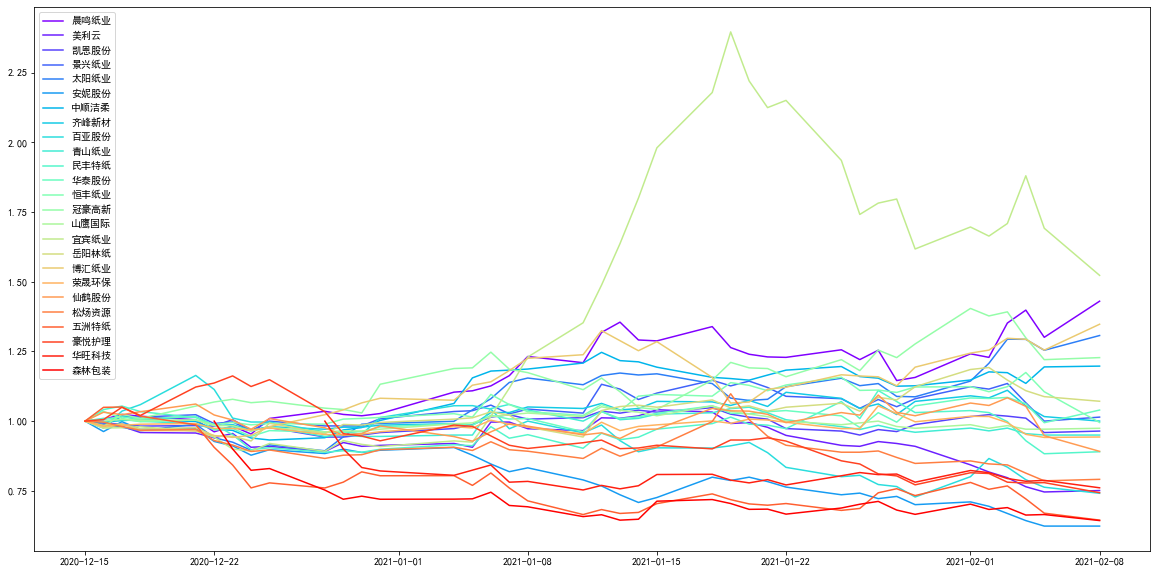

In [30]:
#coding:utf-8
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'

import numpy as np

x = np.linspace(0, 1, 100)
number = len(stocks)
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

plt.rcParams['figure.figsize'] = (20.0, 10.0) # 显示大小
for i, stock in enumerate(stocks):
    df=df_dict[stock].dropna()
    plt.plot(df['close']/df['close'][0],color=colors[i],label=stock_name[stock])
    

# plt.plot(list(df_dict[stock].T),df_indus['close']/df_indus['close'].values[-1],marker='+', linestyle='--', linewidth=1, markersize=4,label="steel")
plt.legend()

In [31]:
import pandas as pd
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)
stock_return={}
for stock in stocks:
    df=df_dict[stock].dropna()
    stock_return[stock]=(df['close']/df['close'][0]).values[-1]
df_stock=pd.DataFrame({'name':stock_name,
       'return':stock_return})
df_stock.sort_values(by="return",inplace=True,ascending=False)
# print(df_indus["close"].values[0]/df_indus["close"].values[-1])
print(df_stock)


             name    return
600793.XSHG  宜宾纸业  1.523112
000488.XSHE  晨鸣纸业  1.430400
600966.XSHG  博汇纸业  1.347732
002078.XSHE  太阳纸业  1.307216
600433.XSHG  冠豪高新  1.227941
002511.XSHE  中顺洁柔  1.197406
600963.XSHG  岳阳林纸  1.071259
600308.XSHG  华泰股份  1.039698
002067.XSHE  景兴纸业  1.014368
002521.XSHE  齐峰新材  1.000000
600356.XSHG  恒丰纸业  0.995152
600567.XSHG  山鹰国际  0.974277
002012.XSHE  凯恩股份  0.964286
600103.XSHG  青山纸业  0.950000
603165.XSHG  荣晟环保  0.943038
603733.XSHG  仙鹤股份  0.891509
600235.XSHG  民丰特纸  0.890090
603863.XSHG  松炀资源  0.791071
605377.XSHG  华旺科技  0.760691
000815.XSHE   美利云  0.750853
605009.XSHG  豪悦护理  0.743175
003006.XSHE  百亚股份  0.741039
605007.XSHG  五洲特纸  0.644732
605500.XSHG  森林包装  0.643119
002235.XSHE  安妮股份  0.623274


In [ ]:
#print(df_dict["002110.XSHE"])
